# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Request Weather Data on each city in list cities
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
city_name = []
city_lat = []
city_temp = []
city_humidity = []
city_wind_speed = []
city_cloudiness = []

#Use try/except code to skip broken url's

for city in cities:
    try:
        query_url = base_url + city + "&appid=" + weather_api_key
        weather_response = requests.get(query_url).json()
        city_name.append(weather_response["name"])
        city_lat.append(weather_response["coord"]["lat"])
        city_temp.append(weather_response["main"]["temp"])
        city_humidity.append(weather_response["main"]["humidity"])
        city_wind_speed.append(weather_response["wind"]["speed"])
        city_cloudiness.append(weather_response["clouds"]["all"])
        print(f"Retrieving {city} weather data")
    except:
        print(f"City not found.  Skipping and going to next city.")
    pass

    



City not found.  Skipping and going to next city.
Retrieving bengkulu weather data
Retrieving disna weather data
Retrieving albany weather data
Retrieving rikitea weather data
City not found.  Skipping and going to next city.
Retrieving hithadhoo weather data
Retrieving mar del plata weather data
Retrieving tuktoyaktuk weather data
Retrieving ust-ilimsk weather data
Retrieving ushuaia weather data
Retrieving new norfolk weather data
Retrieving punta arenas weather data
Retrieving alice springs weather data
City not found.  Skipping and going to next city.
Retrieving birao weather data
Retrieving bulls weather data
Retrieving bogovarovo weather data
Retrieving sakaiminato weather data
Retrieving ler weather data
Retrieving saint-augustin weather data
Retrieving arraial do cabo weather data
Retrieving komsomolskiy weather data
Retrieving sao jose da coroa grande weather data
Retrieving jamestown weather data
Retrieving kapaa weather data
Retrieving hofn weather data
Retrieving port hawke

Retrieving maracacume weather data
Retrieving kalmunai weather data
Retrieving creel weather data
Retrieving mizdah weather data
Retrieving carutapera weather data
Retrieving lompoc weather data
City not found.  Skipping and going to next city.
City not found.  Skipping and going to next city.
Retrieving atkarsk weather data
Retrieving porto novo weather data
Retrieving saint anthony weather data
Retrieving alta floresta weather data
Retrieving port hardy weather data
City not found.  Skipping and going to next city.
Retrieving banjarmasin weather data
Retrieving lorengau weather data
Retrieving japura weather data
City not found.  Skipping and going to next city.
Retrieving okhotsk weather data
Retrieving atlantis weather data
Retrieving harer weather data
Retrieving crib point weather data
Retrieving minsk weather data
Retrieving yining weather data
Retrieving farap weather data
Retrieving tarata weather data
Retrieving bambous virieux weather data
City not found.  Skipping and going

Retrieving codrington weather data
Retrieving timbiqui weather data
Retrieving talnakh weather data
Retrieving tyumentsevo weather data
Retrieving amaigbo weather data
Retrieving holme weather data
Retrieving necochea weather data
Retrieving talcahuano weather data
City not found.  Skipping and going to next city.
Retrieving verkhnevilyuysk weather data
Retrieving tamandare weather data
City not found.  Skipping and going to next city.
Retrieving arman weather data
Retrieving lodja weather data
Retrieving ankang weather data
City not found.  Skipping and going to next city.
Retrieving jequitinhonha weather data
Retrieving krasnovishersk weather data
Retrieving ranfurly weather data
Retrieving douentza weather data
Retrieving benjamin hill weather data
Retrieving honningsvag weather data
Retrieving norsup weather data
Retrieving cumberland weather data
Retrieving broome weather data
Retrieving ferkessedougou weather data
Retrieving kamaishi weather data
Retrieving waingapu weather data


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Convert City Weather Data into Dictionary
city_dict = {
    "City Name": city_name,
    "Latitude": city_lat,
    "Temperature": city_temp,
    "Humidity": city_humidity,
    "Wind Speed": city_wind_speed,
    "Cloudiness": city_cloudiness
            }

In [7]:
#Convert City Dictionary into a Dataframe
city_df = pd.DataFrame(city_dict)
city_df.head()

,City Name,Latitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Bengkulu,-3.80,298.20,86,3.03,100
1,Disna,55.57,270.79,98,2.50,100
2,Albany,42.60,272.65,37,1.34,9
3,Rikitea,-23.12,297.94,72,3.17,7
4,Hithadhoo,-0.60,300.82,70,4.21,1


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Check for cities with Humidity over 100%
humid_check_df = city_df[city_df["Humidity"] > 100]
len(humid_check_df)

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

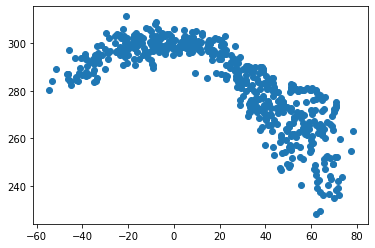

In [10]:
#Plot City Latitude vs. City Temperature
plt.scatter(city_df["Latitude"], city_df["Temperature"], marker = "o")
plt.show()

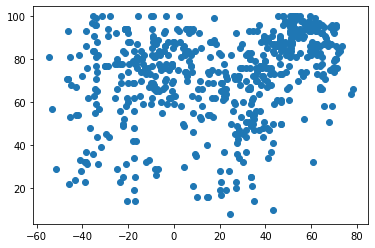

In [11]:
#Plot City Latitude vs. City Humidity
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker = "o")
plt.show()

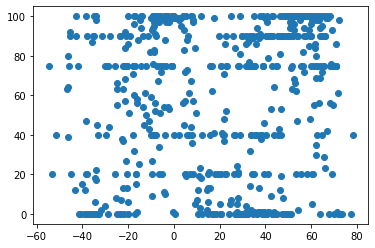

In [12]:
#Plot City Latitude vs. City Cloudiness
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker = "o")
plt.show()

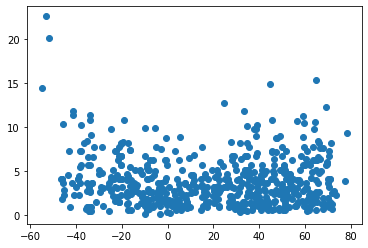

In [13]:
#Plot City Latitude vs. City Windspeed
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker = "o")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression